# Exploring dollar bills. A binary classification model

You will practice building classification models in Keras with the Banknote Authentication dataset.

The goal is to distinguish between real and fake dollar bills. In order to do this, the dataset comes with 4 variables: `variance, skewness, curtosis and entropy`. These variables are calculated by applying mathematical operations over the dollar bill images. 

The labels are found in the `class` variable.

Now that you know what the Banknote Authentication dataset looks like, we'll build a simple model to distinguish between real and fake bills.

You will perform binary classification by using a single neuron as an output. The input layer will have 4 neurons since we have 4 features in our dataset. The model output will be a value constrained between 0 and 1.

We will interpret this number as the probability of our input variables coming from a fake dollar bill, with 1 meaning we are certain it's fake.

In [1]:
# Imports
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load banknotes dataset
banknotes = pd.read_csv("data/banknotes.csv")

banknotes.head()

,variace,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
# splitting banknotes into Train and Test (80/20 stratify)

X = banknotes.iloc[:, :-1].values
y = banknotes["class"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=12345, stratify=y)

/home/sato/anaconda3/envs/tensorflow_py37/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/sato/anaconda3/envs/tensorflow_py37/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


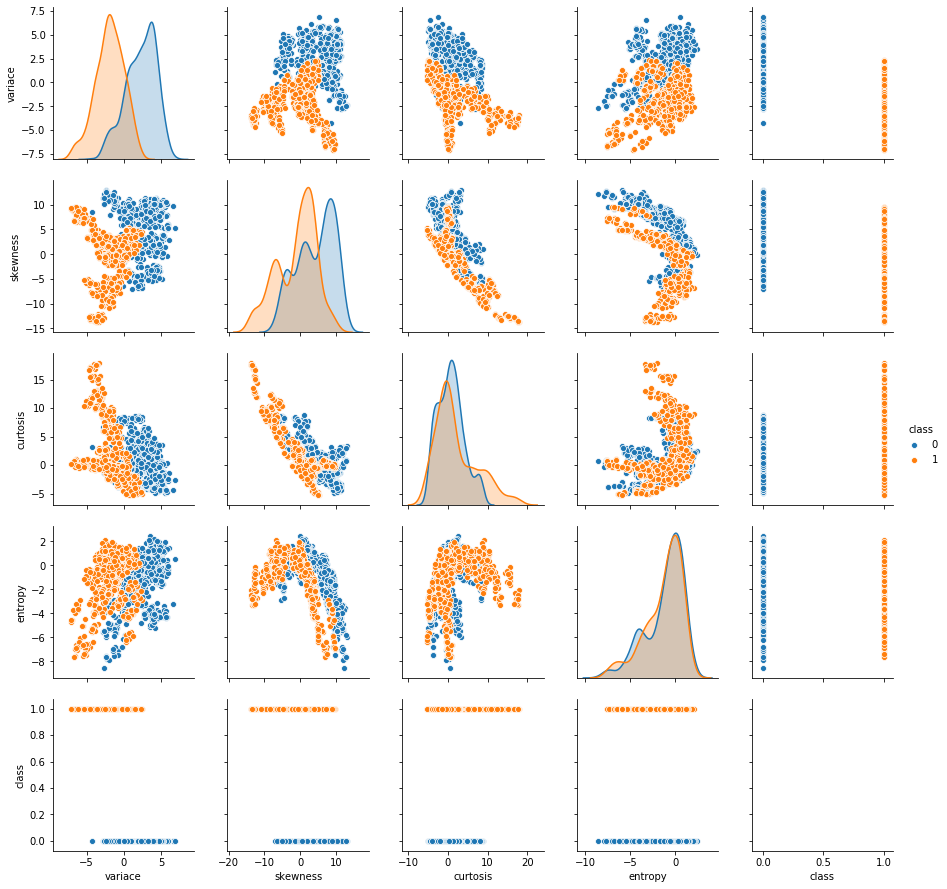

Dataset stats: 
            variace     skewness     curtosis      entropy        class
count  1372.000000  1372.000000  1372.000000  1372.000000  1372.000000
mean      0.433735     1.922353     1.397627    -1.191657     0.444606
std       2.842763     5.869047     4.310030     2.101013     0.497103
min      -7.042100   -13.773100    -5.286100    -8.548200     0.000000
25%      -1.773000    -1.708200    -1.574975    -2.413450     0.000000
50%       0.496180     2.319650     0.616630    -0.586650     0.000000
75%       2.821475     6.814625     3.179250     0.394810     1.000000
max       6.824800    12.951600    17.927400     2.449500     1.000000
Observations per class: 
 0    762
1    610
Name: class, dtype: int64


In [4]:
# Use pairplot and set the hue to be our class
sns.pairplot(banknotes, hue='class')

# Show the plot
plt.show()

# Describe the data
print('Dataset stats: \n', banknotes.describe())

# Count the number of observations of each class
print('Observations per class: \n', banknotes['class'].value_counts())

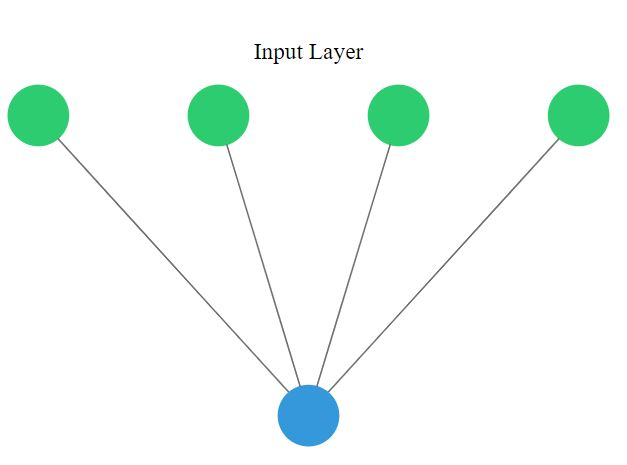

In [5]:
# Create a sequential model
model = Sequential()

In [6]:
# Add a dense layer 
model.add(Dense(1, input_shape=(4,), activation='sigmoid'))

In [7]:
# Compile your model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [8]:
# Display a summary of your model
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 5         
Total params: 5
Trainable params: 5
Non-trainable params: 0
_________________________________________________________________


In [9]:
# Train your model for 20 epochs
model.fit(X_train, y_train, epochs=20);

Train on 274 samples
Epoch 1/20
274/274 [==============================] - 1s 3ms/sample - loss: 1.4700 - accuracy: 0.4635
Epoch 2/20
274/274 [==============================] - 0s 113us/sample - loss: 1.2904 - accuracy: 0.5073
Epoch 3/20
274/274 [==============================] - 0s 162us/sample - loss: 1.1283 - accuracy: 0.5365
Epoch 4/20
274/274 [==============================] - 0s 148us/sample - loss: 0.9830 - accuracy: 0.5547
Epoch 5/20
274/274 [==============================] - 0s 200us/sample - loss: 0.8549 - accuracy: 0.5730
Epoch 6/20
274/274 [==============================] - 0s 152us/sample - loss: 0.7473 - accuracy: 0.6095
Epoch 7/20
274/274 [==============================] - 0s 277us/sample - loss: 0.6564 - accuracy: 0.6533
Epoch 8/20
274/274 [==============================] - 0s 268us/sample - loss: 0.5832 - accuracy: 0.6788
Epoch 9/20
274/274 [==============================] - 0s 140us/sample - loss: 0.5249 - accuracy: 0.7080
Epoch 10/20
274/274 [========================

In [10]:
# Evaluate your model accuracy on the test set
accuracy = model.evaluate(X_test, y_test, verbose=0)

In [11]:
# Print accuracy
print('Accuracy:', accuracy[1])

Accuracy: 0.93442625
